In [28]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [29]:
df = pd.DataFrame()

In [30]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [31]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

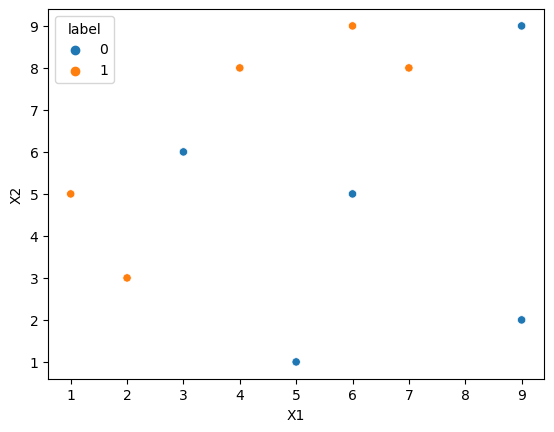

In [32]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [33]:
df['weights'] = 1/df.shape[0]

In [34]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [37]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [38]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

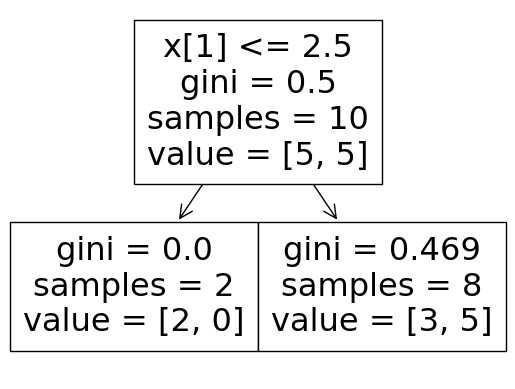

In [39]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

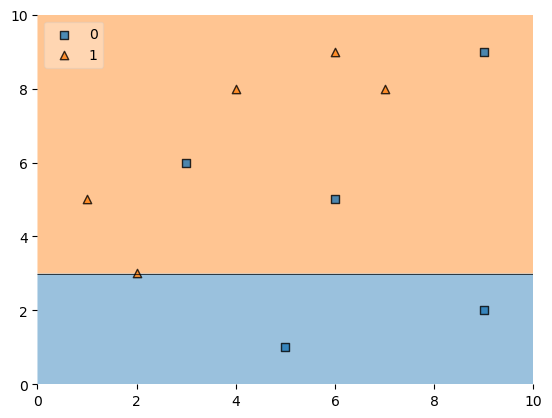

In [40]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [41]:
df['y_pred'] = dt1.predict(X)

In [42]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [43]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [109]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.2)
alpha1

0.6931471805599453

In [110]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [111]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [112]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [113]:
df['updated_weights'].sum()

0.9165153319682015

In [114]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [115]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [116]:
df['nomalized_weights'].sum()

1.0

In [117]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [118]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [119]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [120]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices
     

In [121]:
index_values = create_new_dataset(df)

index_values

[6, 2, 4, 2, 8, 2, 5, 2, 5, 4]

In [122]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [123]:
second_df

,X1,X2,label,weights
6,6,5,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1
5,6,9,1,0.1
4,5,1,0,0.1


In [124]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [125]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [126]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 5.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]')]

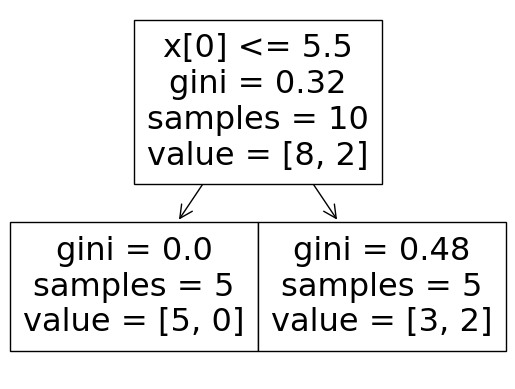

In [127]:
plot_tree(dt2)

<Axes: >

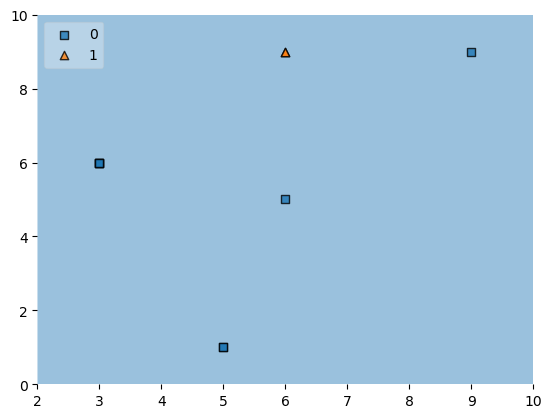

In [128]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [129]:
second_df['y_pred'] = dt2.predict(X)

In [130]:
second_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
2,3,6,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,0
4,5,1,0,0.1,0


In [131]:
alpha2 = calculate_model_weight(0.1)

In [132]:
alpha2

1.0986122886681098

In [133]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [134]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [135]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
6,6,5,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
2,3,6,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
4,5,1,0,0.1,0,0.033622


In [136]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [137]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
6,6,5,0,0.1,0,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922
4,5,1,0,0.1,0,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922
8,9,9,0,0.1,0,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922
5,6,9,1,0.1,0,0.297427,0.344313
2,3,6,0,0.1,0,0.033622,0.038922
5,6,9,1,0.1,0,0.297427,0.344313
4,5,1,0,0.1,0,0.033622,0.038922


In [138]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [139]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [140]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [141]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0,0.038922,0.000000,0.038922
2,3,6,0,0.1,0,0.038922,0.038922,0.077843
4,5,1,0,0.1,0,0.038922,0.077843,0.116765
2,3,6,0,0.1,0,0.038922,0.116765,0.155687
8,9,9,0,0.1,0,0.038922,0.155687,0.194608
2,3,6,0,0.1,0,0.038922,0.194608,0.233530
5,6,9,1,0.1,0,0.344313,0.233530,0.577843
2,3,6,0,0.1,0,0.038922,0.577843,0.616765
5,6,9,1,0.1,0,0.344313,0.616765,0.961078
4,5,1,0,0.1,0,0.038922,0.961078,1.000000


In [142]:
index_values = create_new_dataset(second_df)

In [143]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [144]:
third_df

,X1,X2,label,weights
4,5,1,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1


In [145]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

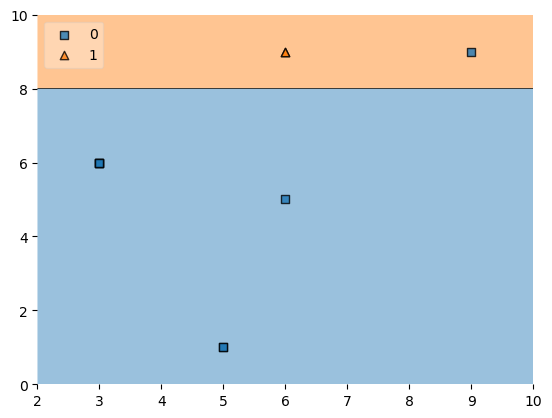

In [147]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [148]:
third_df['y_pred'] = dt3.predict(X)

In [149]:
third_df

,X1,X2,label,weights,y_pred
4,5,1,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,1
2,3,6,0,0.1,0
2,3,6,0,0.1,1
4,5,1,0,0.1,0
8,9,9,0,0.1,1
2,3,6,0,0.1,0


In [151]:
alpha3 = calculate_model_weight(0.3)
alpha3

0.42364893019360184

In [152]:
print(alpha1,alpha2,alpha3)

0.6931471805599453 1.0986122886681098 0.42364893019360184


## PREDICTION

In [153]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [154]:
dt2.predict(query)

array([0], dtype=int64)

In [155]:
dt3.predict(query)

array([0], dtype=int64)

In [156]:
alpha1*1 + alpha2*(1) + alpha3*(1)

2.2154083994216567

In [157]:
np.sign(1.09)

1.0

In [158]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [159]:
dt2.predict(query)

array([0], dtype=int64)

In [160]:
dt3.predict(query)

array([1], dtype=int64)

In [161]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.8291140383017663

In [162]:
np.sign(-0.25)

-1.0